In [1]:
import mse
import solver as sl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Find the influence of separete parameter

In [2]:
time_start = time.time()

In [3]:
# fiducial value
fid_r = 9
fid_strength = 1e6

radius = np.linspace(5,20,10)
strength = 10**np.arange(3,9)

basic_DF = pd.read_csv('../data/ChelyabinskEnergyAltitude.csv')
basic_DF = basic_DF.loc[basic_DF.iloc[:,1]>1]
basic_z, basic_ek = basic_DF.iloc[:,0].to_numpy(), basic_DF.iloc[:,1].to_numpy()

Text(0, 0.5, 'Altitude (m)')

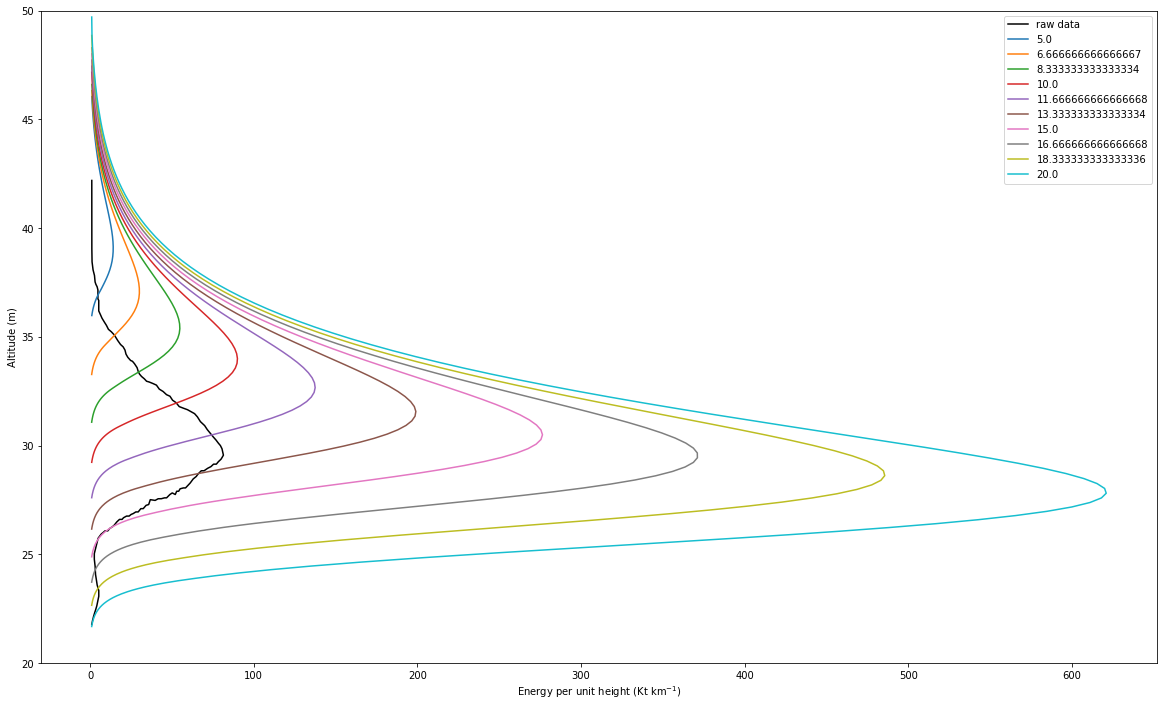

In [4]:
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
for r in radius:
    com_z, com_ek = mse.fit_out(r, fid_strength)
    if com_z is not None:
        plt.plot(com_ek, com_z, label=str(r))
        
plt.ylim(20,50)
plt.legend()
plt.xlabel('Energy per unit height (Kt km$^{-1}$)')
plt.ylabel('Altitude (m)')

from the figure, we can infer that as the radius increase, the break-up point is not changed. **burst energy increases as the radius inrease** and **burst altitude decreases as the radius increase**.

So we can conclude the radius falls in range(8 ~ 10)

Text(0, 0.5, 'Altitude (m)')

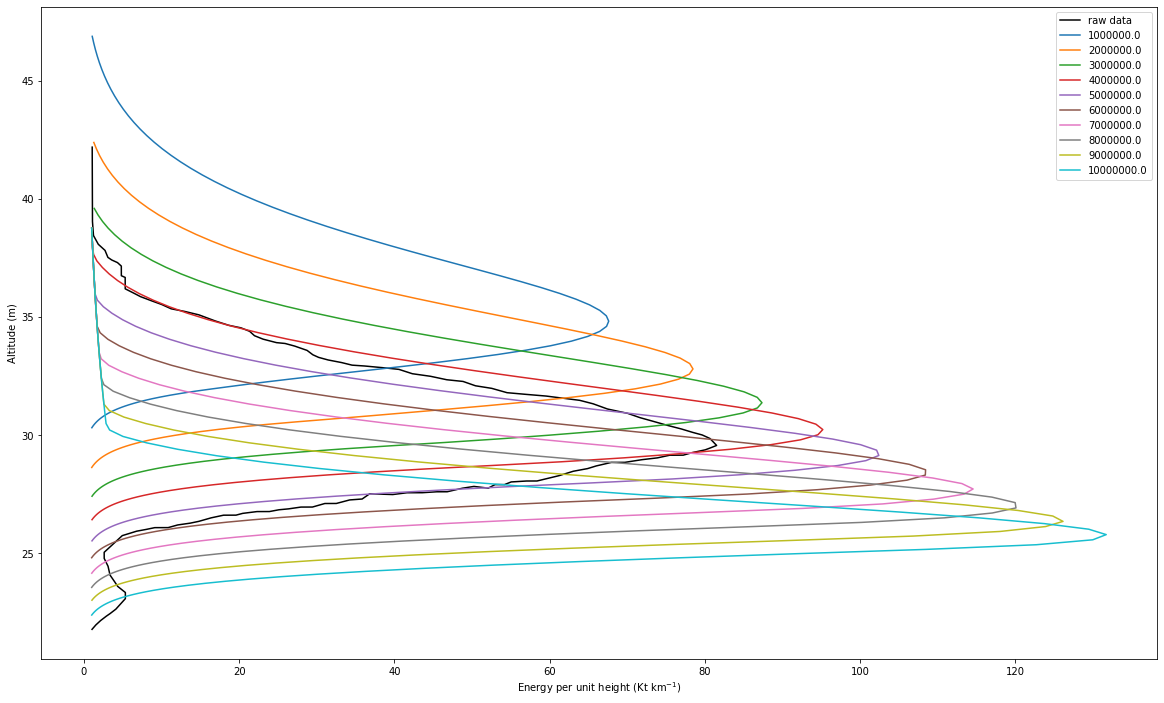

In [5]:
strength = np.linspace(1e6,1e7,10)
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
for s in strength:
    com_z, com_ek = mse.fit_out(fid_r, s)
    if com_z is not None:
        plt.plot(com_ek, com_z, label=str(s))
        
plt.legend()
plt.xlabel('Energy per unit height (Kt km$^{-1}$)')
plt.ylabel('Altitude (m)')

from the figure, we can infer that as the strength increase, the break-up point decreases. **burst energy increases as the strength inrease** and **burst altitude decreases as the strength increase**.

Meanwhile, we can conclude the influence by radius of burst altitude is less than strength of burst altitude.

So we can conclude the strength falls in range(1e6 ~ 1e7)

then we create the **100 combinations of radius and strength by meshgrid to find the best pair of parameters by calculate the error function**, which calculate the the square distance between burst points of fit model and raw data or mean square error.

# First Search Method: search all pairs in combinations of two parameters

## error method is square distance between burst points of fit model and raw data.

In [6]:
t1_start =time.time()

In [7]:
radius = np.linspace(8,10,10)
strength = np.linspace(1e6,1e7,10)
com = np.array(np.meshgrid(radius, strength)).reshape(2,100)

mse_arr = np.zeros(100)
for i in range(com.shape[1]):
    m = mse.calculate_mse(com[0,i], com[1,i], basic_z, basic_ek)
    if m is None:
        m = np.inf
    mse_arr[i] = m

best radius = 8.222
best strength = 5.000e+06
miniimum error = 0.198


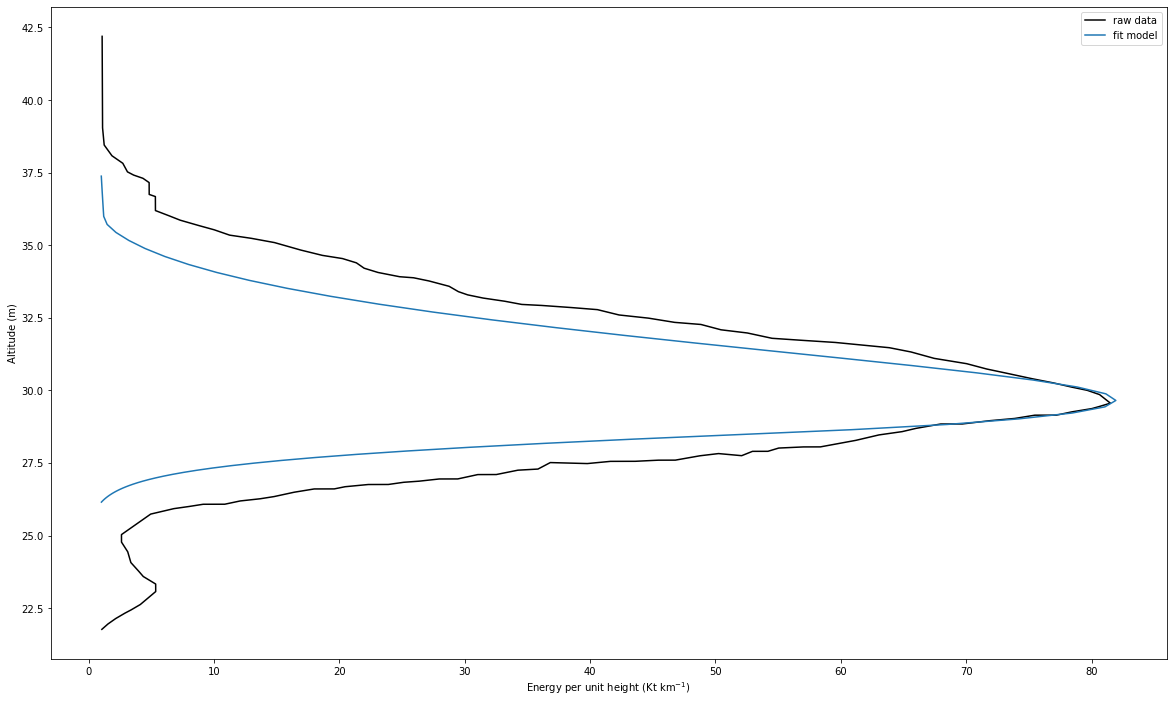

In [8]:
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
mse.output(mse_arr, radius, strength)

In [9]:
t1_end = time.time()
t1_end - t1_start

76.08897924423218

## error method is mean square error

In [10]:
t2_start = time.time()

In [11]:
radius = np.linspace(8,10,10)
strength = np.linspace(1e6,1e7,10)
com = np.array(np.meshgrid(radius, strength)).reshape(2,100)

mse_arr = np.zeros(100)
for i in range(com.shape[1]):
    m = mse.calculate_mse(com[0,i], com[1,i], basic_z, basic_ek, err_method='mse')
    if m is None:
        m = np.inf
    mse_arr[i] = m

best radius = 8.889
best strength = 5.000e+06
miniimum error = 10.221


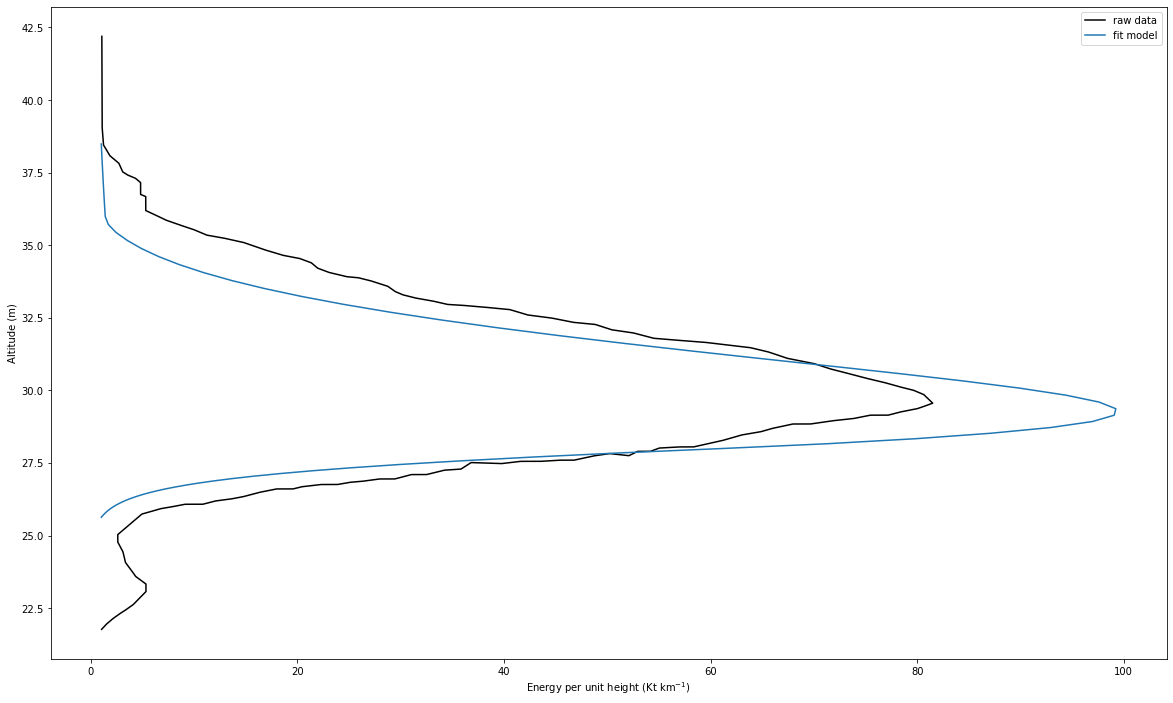

In [12]:
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
mse.output(mse_arr, radius, strength)

In [13]:
t2_end = time.time()
t2_end - t2_start

74.01807308197021

# Second Search Method: fix one parameter and search another

## error method is square distance between burst points of fit model and raw data.

firstly fix radius, adjust strength

In [14]:
t3_start = time.time()

In [15]:
strength = np.linspace(1e6,1e7,20)
radius = np.ones_like(strength)*10.

mse_arr = np.zeros(20)
for i in range(len(strength)):
    m = mse.calculate_mse(com[0,i], com[1,i], basic_z, basic_ek)
    if m is None:
        m = np.inf
    mse_arr[i] = m
    
min_mse = np.min(mse_arr)
min_index = np.argmin(mse_arr)
str_best = strength[min_index//10]

then, fix best strength from above result, adjust radius

In [16]:
radius = np.linspace(8,10,10)
strength = np.ones_like(radius)*str_best

mse_arr = np.zeros(20)
for i in range(len(strength)):
    m = mse.calculate_mse(com[0,i], com[1,i], basic_z, basic_ek)
    if m is None:
        m = np.inf
    mse_arr[i] = m

min_mse = np.min(mse_arr)
min_index = np.argmin(mse_arr)
r_best = radius[min_index%10]

best radius = 8.000
best strength = 1.474e+06
miniimum error = 0.000


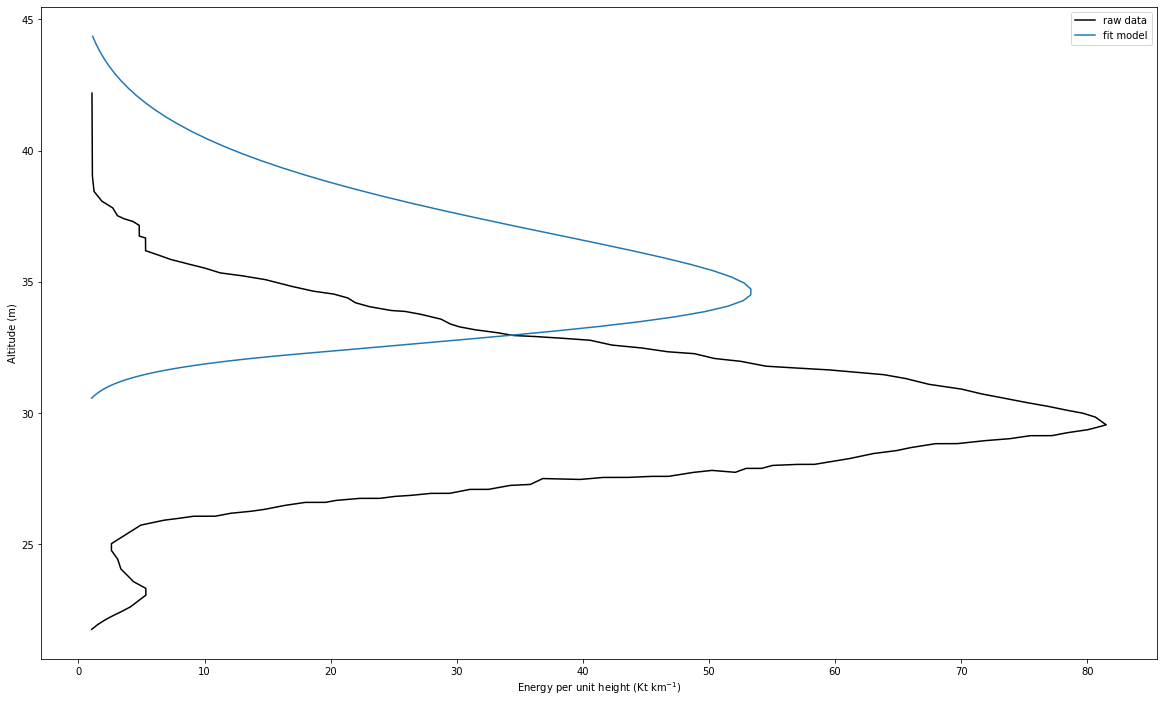

In [17]:
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
com_z, com_ek = mse.fit_out(r_best, str_best)

plt.plot(com_ek, com_z, label='fit model')
plt.xlabel('Energy per unit height (Kt km$^{-1}$)')
plt.ylabel('Altitude (m)')
plt.legend()
print('best radius = %.3f' %r_best)
print('best strength = %.3e' %str_best)
print('miniimum error = %.3f' %min_mse)

In [18]:
t3_end = time.time()
t3_end - t3_start

30.44635796546936

## error method is mean square error

In [19]:
t4_start = time.time()

In [20]:
strength = np.linspace(1e6,1e7,20)
radius = np.ones_like(strength)*10.

mse_arr = np.zeros(20)
for i in range(len(strength)):
    m = mse.calculate_mse(com[0,i], com[1,i], basic_z, basic_ek, err_method='mse')
    if m is None:
        m = np.inf
    mse_arr[i] = m
    
min_mse = np.min(mse_arr)
min_index = np.argmin(mse_arr)
str_best = strength[min_index//10]

In [21]:
radius = np.linspace(8,10,10)
strength = np.ones_like(radius)*str_best

mse_arr = np.zeros(20)
for i in range(len(strength)):
    m = mse.calculate_mse(com[0,i], com[1,i], basic_z, basic_ek, err_method='mse')
    if m is None:
        m = np.inf
    mse_arr[i] = m

min_mse = np.min(mse_arr)
min_index = np.argmin(mse_arr)
r_best = radius[min_index%10]

best radius = 8.000
best strength = 1.000e+06
miniimum error = 0.000


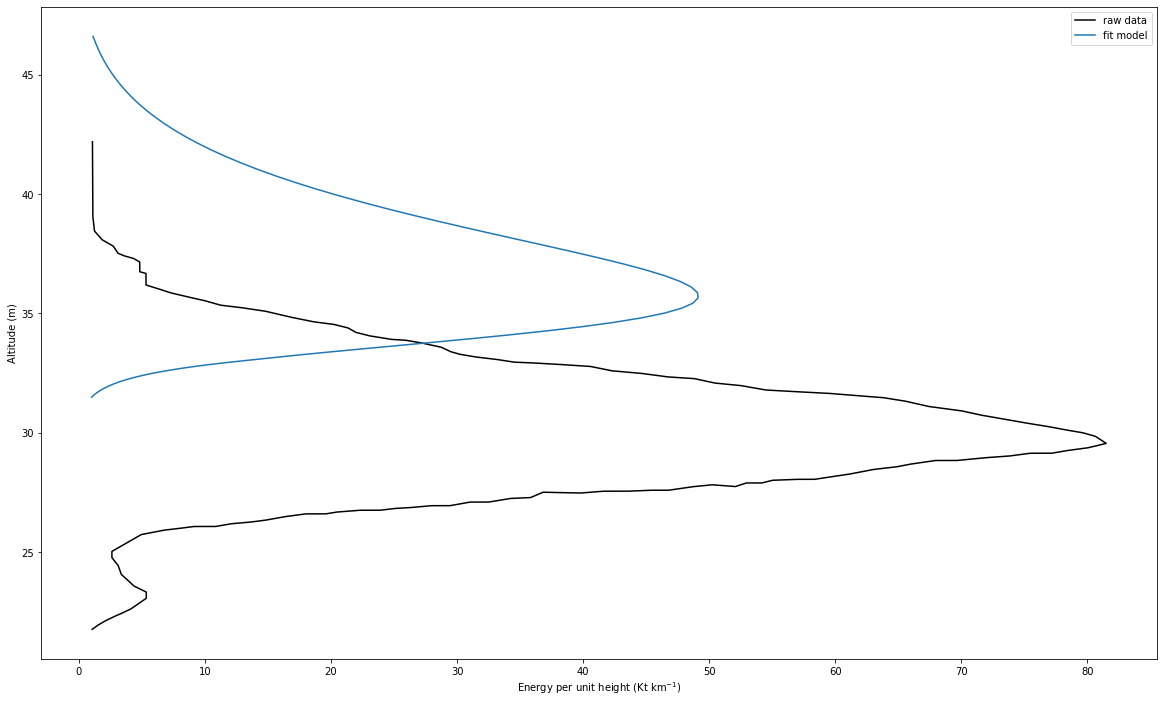

In [22]:
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
com_z, com_ek = mse.fit_out(r_best, str_best)

plt.plot(com_ek, com_z, label='fit model')
plt.xlabel('Energy per unit height (Kt km$^{-1}$)')
plt.ylabel('Altitude (m)')
plt.legend()
print('best radius = %.3f' %r_best)
print('best strength = %.3e' %str_best)
print('miniimum error = %.3f' %min_mse)

In [23]:
t4_end = time.time()
t4_end - t4_start

29.74293613433838

In [24]:
t4_end - t1_start

210.3146412372589

from two figures, we can conclude this method cannot work because two parameters are not independent.

In [25]:
time_end = time.time()
time_cost = time_end - time_start
time_cost

226.83844113349915